In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Task - 1
=

In [34]:
student_df = pd.read_csv('/content/drive/MyDrive/Concepts and Technologies of AI/student_week_5.csv')

In [35]:
print("First five rows of the data\n", student_df.head())

First five rows of the data
    Math  Reading  Writing
0    48       68       63
1    62       81       72
2    79       80       78
3    76       83       79
4    59       64       62


In [36]:
print("Last five rows of the data\n", student_df.tail())

Last five rows of the data
      Math  Reading  Writing
995    72       74       70
996    73       86       90
997    89       87       94
998    83       82       78
999    66       66       72


In [37]:
print("Description of the data\n", student_df.describe())

Description of the data
               Math      Reading      Writing
count  1000.000000  1000.000000  1000.000000
mean     67.290000    69.872000    68.616000
std      15.085008    14.657027    15.241287
min      13.000000    19.000000    14.000000
25%      58.000000    60.750000    58.000000
50%      68.000000    70.000000    69.500000
75%      78.000000    81.000000    79.000000
max     100.000000   100.000000   100.000000


In [38]:
X = student_df[['Math', 'Reading']].values #Features
Y = student_df['Writing'].values #Target

Task - 2
=

In [39]:
print("X (Feature matrix) shape:", X.shape)
print("Y (Target vector) shape:", Y.shape)

X (Feature matrix) shape: (1000, 2)
Y (Target vector) shape: (1000,)


In [40]:
X_transposed = X.T
print("X transposed shape (d×n format):", X_transposed.shape)

X transposed shape (d×n format): (2, 1000)


Task-3
=

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 800 samples
Test set size: 200 samples


Task - 4
=

In [42]:
def cost_function(X, Y, W):

# Parameters:
# This function finds the Mean Square Error.
# Input parameters:
# X: Feature Matrix
# Y: Target Matrix
# W: Weight Matrix
# Output Parameters:
# cost: accumulated mean square error.

  n = len(Y)
  Y_pred = np.dot(X, W)
  sqaured_loss = (Y_pred - Y)**2
  cost = (1 / (2 * n)) * np.sum(sqaured_loss)
  return cost

Task-5
=




In [43]:
X_test_case = np.array([[1, 2], [3, 4], [5, 6]])
Y_test_case = np.array([3,7,11])
W_test_case = np.array([1,1])

cost  = cost_function(X_test_case, Y_test_case, W_test_case)
print(f"Cost function output: {cost}")

if cost == 0:
  print("Cost funtion passed! Proceed further.")
else:
  print("Something went wrong! Reimplement cost functioin.")

Cost function output: 0.0
Cost funtion passed! Proceed further.


Task-6
=

In [44]:
def gradient_descent(X, Y, W, alpha, iterations):
# """
# Perform gradient descent to optimize the parameters of a linear regression model.
# Parameters:
# X (numpy.ndarray): Feature matrix (m x n).
# Y (numpy.ndarray): Target vector (m x 1).
# W (numpy.ndarray): Initial guess for parameters (n x 1).
# alpha (float): Learning rate.
# iterations (int): Number of iterations for gradient descent.
# Returns:
# tuple: A tuple containing the final optimized parameters (W_update) and the history of cost values
# .
# W_update (numpy.ndarray): Updated parameters (n x 1).
# cost_history (list): History of cost values over iterations.
# """
# Initialize cost history
  n = len(Y)
  cost_history = [0] * iterations
  # Number of samples

  for iteration in range(iterations):
  # Step 1: Hypothesis Values
    Y_pred = np.dot(X, W)
  # Step 2: Difference between Hypothesis and Actual Y
    loss = Y_pred - Y
  # Step 3: Gradient Calculation
    dw = (1/n)*np.dot(X.T, loss)
  # Step 4: Updating Values of W using Gradient
    W = W - alpha * dw
  # Step 5: New Cost Value
  cost = cost_function(X, Y, W)
  cost_history.append(cost)
  return W, cost_history

Task-7
=

In [45]:
# Generate random test data
np.random.seed(0) # For reproducibility
X = np.random.rand(100, 3) # 100 samples, 3 features
Y = np.random.rand(100)
W = np.random.rand(3) # Initial guess for parameters
# Set hyperparameters
alpha = 0.01
iterations = 1000
# Test the gradient_descent function
final_params, cost_history = gradient_descent(X, Y, W, alpha, iterations)
# Print the final parameters and cost history
print("Final Parameters:", final_params)
print("Cost History:", cost_history[:10])

Final Parameters: [0.20551667 0.54295081 0.10388027]
Cost History: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Task-8
=

In [46]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
# """
# This Function calculates the Root Mean Squres.
# Input Arguments:
# Y: Array of actual(Target) Dependent Varaibles.
# Y_pred: Array of predeicted Dependent Varaibles.
# Output Arguments:
# rmse: Root Mean Square.
# """
  rmse = np.mean((Y - Y_pred) ** 2)
  return rmse

Task-9
=

In [47]:
# Model Evaluation - R2
def r2(Y, Y_pred):
# """
# This Function calculates the R Squared Error.

# Input Arguments:
# Y: Array of actual(Target) Dependent Varaibles.
# Y_pred: Array of predeicted Dependent Varaibles.
# Output Arguments:
# rsquared: R Squared Error.
# """
  mean_y = np.mean(Y)
  ss_tot = np.sum((Y - np.mean(Y)) ** 2)
  ss_res = np.sum((Y - Y_pred) ** 2)
  r2 = 1 - (ss_res / ss_tot)
  return r2

Task-10
=


Initial weights: [0. 0.]
Learning rate: 1e-05
Iterations: 1000

Final Weights: [0.34811659 0.64614558]
Cost History (First 10 iterations): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
RMSE on Test Set: 27.876541221967504
R-Squared on Test Set: 0.8886354462786421


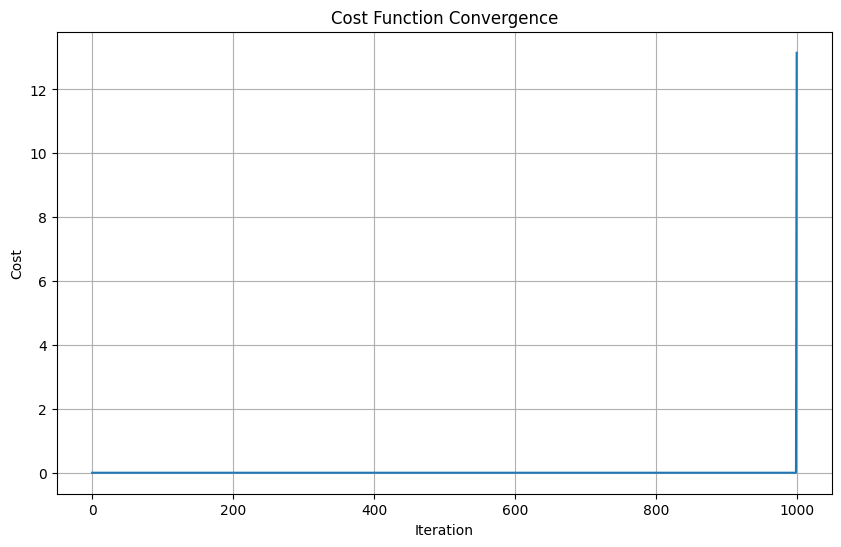

In [54]:
def main():
  # Step 1: Load the dataset
  # Step 2: Split the data into features (X) and target (Y)
  # Step 3: Split the data into training and test sets (80% train, 20% test)
  #Step1 Step2 and Step3 are already done above.
  # Step 4: Initialize weights (W) to zeros, learning rate and number of iterations
  W = np.zeros(X_train.shape[1]) # Initialize weights
  alpha = 0.00001 # Learning rate
  iterations = 1000 # Number of iterations for gradient descent
  print(f"\nInitial weights: {W}")
  print(f"Learning rate: {alpha}")
  print(f"Iterations: {iterations}")
  # Step 5: Perform Gradient Descent
  print()
  W_optimal, cost_history = gradient_descent(X_train, Y_train, W, alpha, iterations)
  # Step 6: Make predictions on the test set
  Y_pred = np.dot(X_test, W_optimal)
  # Step 7: Evaluate the model using RMSE and R-Squared
  model_rmse = rmse(Y_test, Y_pred)
  model_r2 = r2(Y_test, Y_pred)
  # Step 8: Output the results
  print("Final Weights:", W_optimal)
  print("Cost History (First 10 iterations):", cost_history[:10])
  print("RMSE on Test Set:", model_rmse)
  print("R-Squared on Test Set:", model_r2)

  # Plot cost history
  plt.figure(figsize=(10, 6))
  plt.plot(cost_history)
  plt.xlabel('Iteration')
  plt.ylabel('Cost')
  plt.title('Cost Function Convergence')
  plt.grid(True)
  plt.show()

# Execute the main function
if __name__ == "__main__":
  main()